# Funciones

### ¿Para qué necesito funciones?

Hasta ahora todo lo que hemos hecho han sido breves fragmentos de código Python. Esto puede ser razonable para pequeñas tareas, pero nadie quiere reescribir los fragmentos de código cada vez. Necesitamos una manera de organizar nuestro código en piezas manejables.

El primer paso para la **reutilización de código** es la **función**. Se trata de un trozo de código con nombre y separado del resto. Puede tomar cualquier número y tipo de *parámetros* y devolver cualquier número y tipo de *resultados*.

Básicamente podemos hacer dos cosas con una función:
- *Definirla* (con cero o más parámetros).
- *Invocarla* (y obtener cero o más resultados).

## Definir una función

Para definir una función en Python debemos usar la palabra reservada `def` seguida del nombre de la función, paréntesis rodeando a los parámetros de entrada y finalmente dos puntos `:`

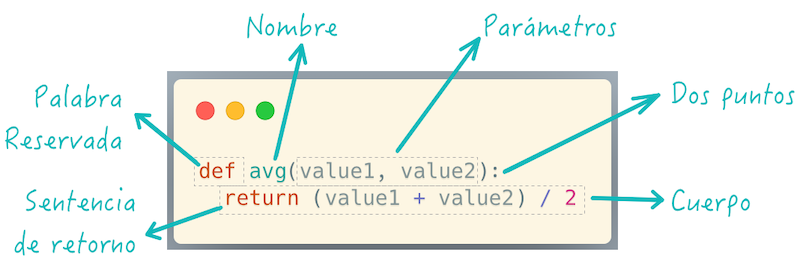

Hagamos una primera función vacía y sin parámetros:

In [13]:
def no_hace_nada():
    pass

## Invocar a una función

Para *invocar* (*llamar*) a una función basta con escribir su nombre y utilizar paréntesis. En el caso de la función sencilla que hemos visto se haría así:

In [14]:
no_hace_nada()

Dado que la función no "hace nada" es razonable que no obtengamos ningún resultado. Vamos a definir otra función que sí tenga algún efecto:

In [15]:
def haz_un_sonido():
    print('PI PI')

In [16]:
haz_un_sonido()

PI PI


> Como era de esperar, al invocar a la función obtenemos un mensaje por pantalla, fruto de la ejecución del cuerpo de la función.

Veamos ahora el caso de una función que *retorna* (*devuelve*) algún valor:

In [17]:
def esVerdadero():
    return True

Podemos hacer uso de esta función, por ejemplo, en sentencias condicionales:

In [18]:
if esVerdadero():
    print('🤝')
else:
    print('👎')

🤝


## Argumentos y parámetros

Vamos a empezar a crear funciones que reciben parámetros. En este caso escribiremos una función `echo` que recibe el parámetro `anything` y muestra esa variable dos veces separada por un espacio:

In [19]:
def echo(anything):
    return anything + ' ' + anything

In [20]:
echo('Hello world!')

'Hello world! Hello world!'

En este caso, `'Hello world!'` sería un *argumento* de la función.

Cuando llamamos a una función con *argumentos*, los valores de estos argumentos se copian en los correspondientes *parámetros* dentro de la función:

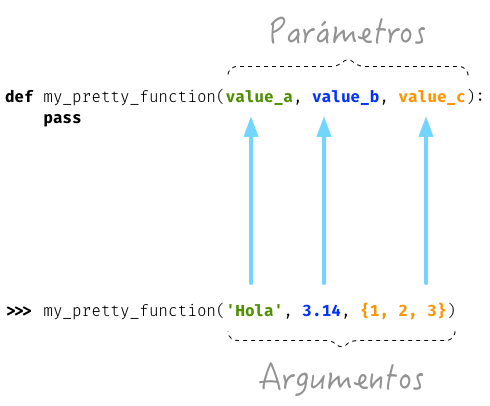

Veamos otra función con algo más de "lógica" en su cuerpo:

In [21]:
def fruit_detection(color):
    if color == 'red':
        return "It's an apple"
    elif color == 'yellow':
        return "It's a banana"
    elif color == 'green':
        return "It's a kiwi"
    else:
        return f"I don't know about the color {color}"

In [22]:
fruit = fruit_detection('green')
fruit

"It's a kiwi"

Aunque una función no tenga un `return` de forma explícita, siempre devolverá `None` de forma implícita:

In [23]:
def do_nothing():
    pass

print(do_nothing())

None


### Ejercicio

Escribir una función en Python que reproduzca lo siguiente:

$f(x, y) = x^2 + y^2$

In [24]:
# Escribe aquí la función:
def funcion_de_ejercicio(x, y):
    return x**2 + y**2

In [25]:
#Comprueba tu solución:
print(funcion_de_ejercicio(3, 4))

25


### `None` es útil

`None` es un valor especial de Python que almacena *el valor nulo*. No es lo mismo que `False` aunque lo parezca cuando lo evaluamos como *booleano*:

In [26]:
thing = None
if thing:
    print("It's some thing")
else:
    print("It's no thing")

It's no thing


Para distinguir `None` del valor booleano `False` se recomienda el uso del operador `is`:

In [29]:
thing = None
if thing is None:
    print("It's nothing")
else:
    print("It's something")

It's nothing


Vamos a definir una función que imprime si su argumento es `None`, `True` o `False`:

In [30]:
def whatis(thing):
    if thing is None:
        print(thing, 'is None')
    elif thing:
        print(thing, 'is True')
    else:
        print(thing, 'is False')

Valores que evalúan en booleano como **falsos**:

In [31]:
whatis(0)

0 is False


In [32]:
whatis(0.0)

0.0 is False


In [33]:
whatis('')  # cadena vacía

 is False


In [34]:
whatis(())  # tupla vacía

() is False


In [35]:
whatis([])  # lista vacía

[] is False


In [36]:
whatis({})  # diccionario vacío

{} is False


Valores que evalúan en booleano como **verdaderos**:

In [37]:
whatis(0.00001)

1e-05 is True


In [38]:
whatis([0])

[0] is True


In [39]:
whatis([''])

[''] is True


In [40]:
whatis(' ')

  is True


### Especificar parámetros con valores por defecto

Es posible especificar valores por defecto en los parámetros de una función. El valor por defecto se usará cuando en la llamada a la función no se haya proporcionado el correspondiente argumento.

In [41]:
def menu(wine, entree, dessert='Tiramisú'):
    return {'wine': wine, 'entree': entree, 'dessert': dessert}

In [42]:
# Hacemos uso del valor por defecto del parámetro "dessert"

menu('Ignios', 'Ensalada')

{'wine': 'Ignios', 'entree': 'Ensalada', 'dessert': 'Tiramisú'}

In [43]:
# "Sobreescribimos" el valor de "dessert" especificando uno concreto

menu('Tajinaste', 'Revuelto de setas', 'Helado')

{'wine': 'Tajinaste', 'entree': 'Revuelto de setas', 'dessert': 'Helado'}

> Los valores por defecto en los parámetros se calculan cuando se **define** la función, no cuando se **ejecuta**.

En la siguiente función, uno esperaría que `result` tuviera una lista vacía en cada ejecución, pero como estamos modificando ese parámetro dentro de la función, este cambio perdura en el tiempo:

In [44]:
def buggy(arg, result=[]):
    result.append(arg)
    print(result)

In [45]:
buggy('a')

['a']


In [46]:
buggy('b')  # se esperaría ['b']

['a', 'b']


Habría funcionado si hubiéramos escrito algo así:

In [47]:
def works(arg):
    result = []
    result.append(arg)
    return result

In [48]:
works('a')

['a']

In [49]:
works('b')

['b']

La forma de arreglar el código anterior utilizando un parámetro con valor por defecto sería indicar cuál es la primera llamada:

In [50]:
def nonbuggy(arg, result=None):
    if result is None:
        result = []
    result.append(arg)
    print(result)

In [51]:
nonbuggy('a')

['a']


In [52]:
nonbuggy('b')

['b']


> Esto suele ser pregunta para entrevistas de trabajo en Python!

### Reunir/Desplegar argumentos posicionales

Python ofrece la posibilidad de utilizar un asterisco `*` en los parámetros de las funciones. Sirve para **reunir** múltiples argumentos posicionales en una única tupla como valor del parámetro.

In [53]:
def print_args(*args):
    print('Positional tuple:', args)

Si llamamos a la función sin argumentos no obtendremos nada en `*args`:

In [54]:
print_args()

Positional tuple: ()


Pero la parte interesante es que podemos pasar cualquier número de argumentos:

In [55]:
print_args(1, 2, 3, 'pescado', 'salado', 'es')

Positional tuple: (1, 2, 3, 'pescado', 'salado', 'es')


También podemos utilizar esta estrategia para establecer en una función una serie de parámetros como *requeridos* y recibir el *resto de argumentos* como opcionales y empaquetados:

In [56]:
def sum_all(v1, v2, *args):
    total = 0
    for value in (v1, v2) + args:  # args es una tupla
        total += value
    return total

In [59]:
sum_all()

TypeError: sum_all() missing 2 required positional arguments: 'v1' and 'v2'

In [60]:
sum_all(1, 2)

3

In [61]:
sum_all(5, 9, 3, 8, 11, 21)

57

Existe la posibilidad de usar el asterisco `*` en la llamada a la función para **desplegar** los argumentos posicionales:

In [64]:
def print_args(*args):
    print('Positional tuple:', args)


In [65]:
print_args(2, 5, 7, 'x')

Positional tuple: (2, 5, 7, 'x')


In [66]:
args = (2, 5, 7, 'x')

In [67]:
print_args(args)

Positional tuple: ((2, 5, 7, 'x'),)


In [68]:
print_args(*args)  # despliegue de argumentos

Positional tuple: (2, 5, 7, 'x')


## Documentación

Podemos (y en muchos casos *debemos*) adjuntar **documentación** a la definición de una función incluyendo una cadena de texto (**`docstring`**) en el comienzo de su cuerpo:

In [69]:
def echo(anything):
    'echo returns its input argument'
    return anything

Podemos escribir un `docstring` con más información utilizando triples comillas `'''`:

In [70]:
def print_if_true(thing, check):
    '''
    Prints the first argument if a second argument is true.
    The operation is:
        1. Check whether the *second* argument is true.
        2. If it is, print the *first* argument.
    '''
    if check:
        print(thing)

Para imprimir el `docstring` de una función, basta con hacer uso de la función `help`:

In [71]:
help(echo)

Help on function echo in module __main__:

echo(anything)
    echo returns its input argument



Si queremos ver el `docstring` en *crudo* sin ningún formato, haríamos lo siguiente:

In [72]:
print(print_if_true.__doc__)


    Prints the first argument if a second argument is true.
    The operation is:
        1. Check whether the *second* argument is true.
        2. If it is, print the *first* argument.
    


## Las funciones también son objetos

Como ya se ha comentado, en Python "*todo es un objeto*", y también ocurre con las *funciones*. Podemos asignar una función a una variable, podemos usarlas como argumentos de otras funciones y como valor de retorno. Esto permite una gran flexibilidad y aporta nuevas posibilidades al lenguaje.

In [73]:
def respuesta():
    print(42)

respuesta()

42


Ahora vamos a definir una función que recibe otra función como parámetro y se encarga de invocarla:

In [74]:
def run_something(func):
    func()

run_something(respuesta)  # función "respuesta" como parámetro

42


Veamos ahora otro ejemplo definiendo una función con argumentos:

In [75]:
def suma_args(arg1, arg2):
    print(arg1 + arg2)

In [76]:
def funcion_auxiliar(func, arg1, arg2):
    func(arg1, arg2)

Ahora podemos invocar a la función pasando como parámetros la otra función y dos valores que sumar:

In [77]:
type(suma_args)

function

In [78]:
funcion_auxiliar(suma_args, 5, 9)

14


<hr>


<h2 id="global">Variables globales</h2>


Hasta ahora, hemos estado creando variables dentro de funciones, pero no hemos creado variables fuera de la función. Estas se llaman variables globales. <br>
Intentemos ver qué devuelve <code>printer1</code>:

In [81]:
# Ejemplo de variable global

artist = "Michael Jackson"
def printer1(artist):
    internal_var1 = artist
    print(artist, "es un artista")
    
printer1(artist)
# Mira que pasa si corres la siguiente línea
# printer1(internal_var1) 

Michael Jackson es un artista


## Ejercicios de Funciones


Crea una función que divida la primera entrada por la segunda entrada:

In [82]:
# Crea una función que divida la primera entrada por la segunda entrada:

def division(a, b):
    return a / b


<hr>


Utiliza la función <code>con</code> para la siguiente pregunta.

In [83]:
def con(a, b):
    return(a + b)

¿Se puede usar la función <code>con</code> que definimos antes para sumar tanto dos enteros como dos strings?

In [87]:
# Pruebalo

print(con('hello', 'world'))


helloworld


<hr>


¿Se puede usar la función <code>con</code> que definimos antes para concatenar listas?

In [88]:
# Pruebalo
lista1 = [1, 2, 3]
lista2 = [4, 5, 6]

con(lista1, lista2)


[1, 2, 3, 4, 5, 6]